In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("train.csv", parse_dates=['DisbursalDate', 'Date.of.Birth'])
test = pd.read_csv("test.csv", parse_dates=['DisbursalDate', 'Date.of.Birth'])

submission = pd.read_csv("sample_submission.csv")

In [3]:
train.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
len(train), train.UniqueID.nunique()

(233154, 233154)

In [5]:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [6]:
train.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [7]:

print(train['PERFORM_CNS.SCORE.DESCRIPTION'].iloc[:3])
print(train['AVERAGE.ACCT.AGE'].iloc[:3])
print(train['CREDIT.HISTORY.LENGTH'].iloc[:3])

0    No Bureau History Available
1                  I-Medium Risk
2    No Bureau History Available
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: object
0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object
0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, dtype: object


In [8]:

'''    
Feature Engineering:

Date.of.Birth                       - derive Age from this and drop this 
DisbursalDate                       - derive days elapsed since loan disbursal and drop this
Employment.Type                     - vectorize categorical data    
PERFORM_CNS.SCORE.DESCRIPTION       - vectorize categorical data
AVERAGE.ACCT.AGE                    - extract the #yrs and #months as total # months
CREDIT.HISTORY.LENGTH               - extract the #yrs and #months as total # months
'''

'    \nFeature Engineering:\n\nDate.of.Birth                       - derive Age from this and drop this \nDisbursalDate                       - derive days elapsed since loan disbursal and drop this\nEmployment.Type                     - vectorize categorical data    \nPERFORM_CNS.SCORE.DESCRIPTION       - vectorize categorical data\nAVERAGE.ACCT.AGE                    - extract the #yrs and #months as total # months\nCREDIT.HISTORY.LENGTH               - extract the #yrs and #months as total # months\n'

In [9]:
import datetime

train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'])
train['DisbursalDate'] = pd.to_datetime(train['DisbursalDate'])

now = datetime.datetime.now()
train['Age'] = ((now - train['Date.of.Birth'])/365).dt.days



In [10]:
train['Age'][:3]

0    35
1    33
2    33
Name: Age, dtype: int64

19866 233154


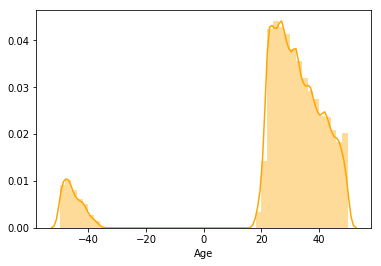

In [11]:
sns.distplot(train['Age'],  color = 'orange')

print(len(train[train['Age'] <= 0]), len(train))

In [12]:
delta = (now - train['DisbursalDate'])
train['Days_Since_Disbursal'] = delta.dt.days

0    404
1    202
2    463
Name: Days_Since_Disbursal, dtype: int64


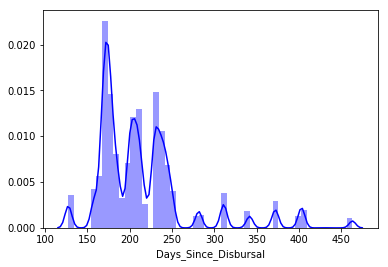

In [13]:
print(train['Days_Since_Disbursal'][:3])

sns.distplot(train['Days_Since_Disbursal'], color='blue')

In [14]:
train['CREDIT.HISTORY.LENGTH_yr'] = train['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
train['CREDIT.HISTORY.LENGTH_yr'] = train['CREDIT.HISTORY.LENGTH_yr'].apply(lambda x: x.split('yrs')[0])

train['CREDIT.HISTORY.LENGTH_mon'] = train['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1])
train['CREDIT.HISTORY.LENGTH_mon'] = train['CREDIT.HISTORY.LENGTH_mon'].apply(lambda x: x.split('mon')[0])

train['CREDIT.HISTORY.LENGTH_total_months'] = (train['CREDIT.HISTORY.LENGTH_yr'].astype(int))*12 + train['CREDIT.HISTORY.LENGTH_mon'].astype(int)
train = train.drop(['CREDIT.HISTORY.LENGTH_yr', 'CREDIT.HISTORY.LENGTH_mon'], axis = 1)



In [15]:

train['AVERAGE.ACCT.AGE_yr'] = train['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
train['AVERAGE.ACCT.AGE_yr'] = train['AVERAGE.ACCT.AGE_yr'].apply(lambda x: x.split('yrs')[0])

train['AVERAGE.ACCT.AGE_mon'] = train['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1])
train['AVERAGE.ACCT.AGE_mon'] = train['AVERAGE.ACCT.AGE_mon'].apply(lambda x: x.split('mon')[0])

train['AVERAGE.ACCT.AGE_total_months'] = (train['AVERAGE.ACCT.AGE_yr'].astype(int))*12 + train['AVERAGE.ACCT.AGE_mon'].astype(int)

train = train.drop(['AVERAGE.ACCT.AGE_yr', 'AVERAGE.ACCT.AGE_mon'], axis = 1)


0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object 0     0
1    23
2     0
Name: AVERAGE.ACCT.AGE_total_months, dtype: int64


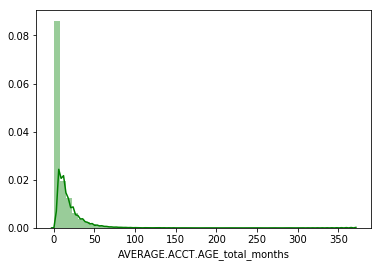

In [16]:
print(train['AVERAGE.ACCT.AGE'][:3], train['AVERAGE.ACCT.AGE_total_months'][:3])
sns.distplot(train['AVERAGE.ACCT.AGE_total_months'] ,color='green')


0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, dtype: object 0     0
1    23
2     0
Name: CREDIT.HISTORY.LENGTH_total_months, dtype: int64


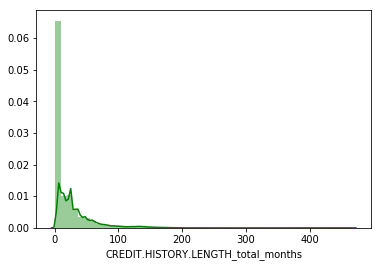

In [17]:
print(train['CREDIT.HISTORY.LENGTH'][:3], train['CREDIT.HISTORY.LENGTH_total_months'][:3])
sns.distplot(train['CREDIT.HISTORY.LENGTH_total_months'] ,color='green')


In [18]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [19]:
train['Employment.Type'].fillna('Unemployed', inplace = True)

print(train.isnull().sum().sum())

0


In [20]:
## Label Encoding for Employment Type
train['Employment.Type'] = train['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))


In [21]:
train['Employment.Type'].value_counts()

2    127635
1     97858
0      7661
Name: Employment.Type, dtype: int64

In [22]:
train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [23]:
## Label Encoding for PERFORM_CNS.SCORE.DESCRIPTION

train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()




0    129785
5     50728
4     18294
3     12412
2     12025
1      9910
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [24]:
## categorical attributes that have integer datatype
'''
branch_id                                       int64
>supplier_id                                     int64
manufacturer_id                                 int64
>Current_pincode_ID                              int64
State_ID                                        int64
>Employee_code_ID                                int64
'''

'\nbranch_id                                       int64\n>supplier_id                                     int64\nmanufacturer_id                                 int64\n>Current_pincode_ID                              int64\nState_ID                                        int64\n>Employee_code_ID                                int64\n'

In [25]:
train['branch_id'].nunique(), train['supplier_id'].nunique(), train['manufacturer_id'].nunique(), train['Current_pincode_ID'].nunique(), train['State_ID'].nunique(), train['Employee_code_ID'].nunique()



(82, 2953, 11, 6698, 22, 3270)

In [26]:
train['branch_id'] = train['branch_id'].astype('category')
train['manufacturer_id'] = train['manufacturer_id'].astype('category')
train['State_ID'] = train['State_ID'].astype('category')


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['branch_id'] = le.fit_transform(train['branch_id'])
train['manufacturer_id'] = le.fit_transform(train['manufacturer_id'])
train['State_ID'] = le.fit_transform(train['State_ID'])



In [28]:
## Apply Log transform on all the features below:
'''
PERFORM_CNS.SCORE
disbursed_amount
asset_cost
ltv
PRIMARY.INSTAL.AMT
SEC.INSTAL.AMT
SEC.NO.OF.ACCTS
SEC.ACTIVE.ACCTS
SEC.OVERDUE.ACCTS
SEC.SANCTIONED.AMOUNT
SEC.DISBURSED.AMOUNT
SEC.CURRENT.BALANCE
PRI.NO.OF.ACCTS
PRI.ACTIVE.ACCTS
PRI.OVERDUE.ACCTS
PRI.CURRENT.BALANCE
PRI.SANCTIONED.AMOUNT
PRI.DISBURSED.AMOUNT
'''

'\nPERFORM_CNS.SCORE\ndisbursed_amount\nasset_cost\nltv\nPRIMARY.INSTAL.AMT\nSEC.INSTAL.AMT\nSEC.NO.OF.ACCTS\nSEC.ACTIVE.ACCTS\nSEC.OVERDUE.ACCTS\nSEC.SANCTIONED.AMOUNT\nSEC.DISBURSED.AMOUNT\nSEC.CURRENT.BALANCE\nPRI.NO.OF.ACCTS\nPRI.ACTIVE.ACCTS\nPRI.OVERDUE.ACCTS\nPRI.CURRENT.BALANCE\nPRI.SANCTIONED.AMOUNT\nPRI.DISBURSED.AMOUNT\n'

In [29]:
train['PRI.CURRENT.BALANCE'].fillna(train['PRI.CURRENT.BALANCE'].mean(), inplace = True)
train['PRI.SANCTIONED.AMOUNT'].fillna(train['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
train['SEC.CURRENT.BALANCE'].fillna(train['SEC.CURRENT.BALANCE'].mean(), inplace = True)

In [30]:
train['PERFORM_CNS.SCORE'] = np.log1p(train['PERFORM_CNS.SCORE'])
train['disbursed_amount'] = np.log1p(train['disbursed_amount'])
train['asset_cost'] = np.log1p(train['asset_cost'])
train['ltv'] = np.log1p(train['ltv'])
train['PRIMARY.INSTAL.AMT'] = np.log1p(train['PRIMARY.INSTAL.AMT'])
train['SEC.INSTAL.AMT'] = np.log1p(train['SEC.INSTAL.AMT'])
train['SEC.NO.OF.ACCTS'] = np.log1p(train['SEC.NO.OF.ACCTS'])
train['SEC.ACTIVE.ACCTS'] = np.log1p(train['SEC.ACTIVE.ACCTS'])
train['SEC.OVERDUE.ACCTS'] = np.log1p(train['SEC.OVERDUE.ACCTS'])
train['SEC.SANCTIONED.AMOUNT'] = np.log1p(train['SEC.SANCTIONED.AMOUNT'])
train['SEC.DISBURSED.AMOUNT'] = np.log1p(train['SEC.DISBURSED.AMOUNT'])
#train['SEC.CURRENT.BALANCE'] = np.log1p(train['SEC.CURRENT.BALANCE'])
train['PRI.NO.OF.ACCTS'] = np.log1p(train['PRI.NO.OF.ACCTS'])
train['PRI.ACTIVE.ACCTS'] = np.log1p(train['PRI.ACTIVE.ACCTS'])
train['PRI.OVERDUE.ACCTS'] = np.log1p(train['PRI.OVERDUE.ACCTS'])
#train['PRI.CURRENT.BALANCE'] = np.log1p(train['PRI.CURRENT.BALANCE'])
#train['PRI.SANCTIONED.AMOUNT'] = np.log1p(train['PRI.SANCTIONED.AMOUNT'])
train['PRI.DISBURSED.AMOUNT'] = np.log1p(train['PRI.DISBURSED.AMOUNT'])



In [31]:
## Transformations to be done on test data:
'''
Date.of.Birth                       - derive Age from this and drop this 
DisbursalDate                       - derive days elapsed since loan disbursal
Employment.Type                     - label encode categorical data    
PERFORM_CNS.SCORE.DESCRIPTION       - label encode categorical data
AVERAGE.ACCT.AGE                    - extract the #yrs and #months as total # months
CREDIT.HISTORY.LENGTH               - extract the #yrs and #months as total # months
branch_id                           - convert to category and label encode
manufacturer_id                     - convert to category and label encode
State_ID                            - convert to category and label encode
'''

## Log transform:
'''
PERFORM_CNS.SCORE
disbursed_amount
asset_cost
ltv
PRIMARY.INSTAL.AMT
SEC.INSTAL.AMT
SEC.NO.OF.ACCTS
SEC.ACTIVE.ACCTS
SEC.OVERDUE.ACCTS
SEC.SANCTIONED.AMOUNT
SEC.DISBURSED.AMOUNT
SEC.CURRENT.BALANCE
PRI.NO.OF.ACCTS
PRI.ACTIVE.ACCTS
PRI.OVERDUE.ACCTS
PRI.CURRENT.BALANCE
PRI.SANCTIONED.AMOUNT
PRI.DISBURSED.AMOUNT
'''

'\nPERFORM_CNS.SCORE\ndisbursed_amount\nasset_cost\nltv\nPRIMARY.INSTAL.AMT\nSEC.INSTAL.AMT\nSEC.NO.OF.ACCTS\nSEC.ACTIVE.ACCTS\nSEC.OVERDUE.ACCTS\nSEC.SANCTIONED.AMOUNT\nSEC.DISBURSED.AMOUNT\nSEC.CURRENT.BALANCE\nPRI.NO.OF.ACCTS\nPRI.ACTIVE.ACCTS\nPRI.OVERDUE.ACCTS\nPRI.CURRENT.BALANCE\nPRI.SANCTIONED.AMOUNT\nPRI.DISBURSED.AMOUNT\n'

9839 112392


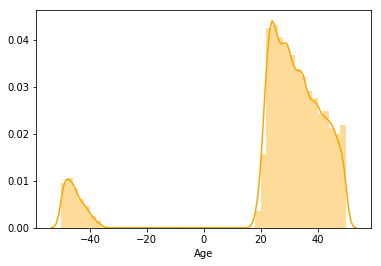

In [32]:
##Date.of.Birth - derive Age from this and drop this 

test['Date.of.Birth'] = pd.to_datetime(test['Date.of.Birth'])

now = datetime.datetime.now()
test['Age'] = ((now - test['Date.of.Birth'])/365).dt.days

sns.distplot(test['Age'],  color = 'orange')

print(len(test[test['Age'] <= 0]), len(test))

0    401
1    147
2    138
Name: Days_Since_Disbursal, dtype: int64


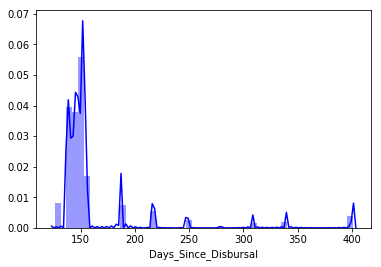

In [33]:
##DisbursalDate - derive days elapsed since loan disbursal

test['DisbursalDate'] = pd.to_datetime(test['DisbursalDate'])
delta = (now - test['DisbursalDate'])
test['Days_Since_Disbursal'] = delta.dt.days

print(test['Days_Since_Disbursal'][:3])

sns.distplot(test['Days_Since_Disbursal'], color='blue')


In [34]:
##Employment.Type - label encode categorical data

test['Employment.Type'].fillna('Unemployed', inplace = True)
## Label Encoding for Employment Type
test['Employment.Type'] = test['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))

test['Employment.Type'].value_counts()

2    59794
1    49155
0     3443
Name: Employment.Type, dtype: int64

In [35]:
##PERFORM_CNS.SCORE.DESCRIPTION - label encode categorical data

test['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

## Label Encoding for PERFORM_CNS.SCORE.DESCRIPTION

test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
test['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()




0    63017
5    24993
4     8070
3     5990
2     5642
1     4680
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [36]:
##AVERAGE.ACCT.AGE - extract the #yrs and #months as total # months

test['AVERAGE.ACCT.AGE_yr'] = test['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
test['AVERAGE.ACCT.AGE_yr'] = test['AVERAGE.ACCT.AGE_yr'].apply(lambda x: x.split('yrs')[0])

test['AVERAGE.ACCT.AGE_mon'] = test['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1])
test['AVERAGE.ACCT.AGE_mon'] = test['AVERAGE.ACCT.AGE_mon'].apply(lambda x: x.split('mon')[0])

test['AVERAGE.ACCT.AGE_total_months'] = (test['AVERAGE.ACCT.AGE_yr'].astype(int))*12 + test['AVERAGE.ACCT.AGE_mon'].astype(int)

test = test.drop(['AVERAGE.ACCT.AGE_yr', 'AVERAGE.ACCT.AGE_mon'], axis = 1)



In [37]:
##CREDIT.HISTORY.LENGTH  - extract the #yrs and #months as total # months

test['CREDIT.HISTORY.LENGTH_yr'] = test['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
test['CREDIT.HISTORY.LENGTH_yr'] = test['CREDIT.HISTORY.LENGTH_yr'].apply(lambda x: x.split('yrs')[0])

test['CREDIT.HISTORY.LENGTH_mon'] = test['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1])
test['CREDIT.HISTORY.LENGTH_mon'] = test['CREDIT.HISTORY.LENGTH_mon'].apply(lambda x: x.split('mon')[0])

test['CREDIT.HISTORY.LENGTH_total_months'] = (test['CREDIT.HISTORY.LENGTH_yr'].astype(int))*12 + test['CREDIT.HISTORY.LENGTH_mon'].astype(int)
test = test.drop(['CREDIT.HISTORY.LENGTH_yr', 'CREDIT.HISTORY.LENGTH_mon'], axis = 1)



In [38]:
##branch_id  - convert to category and label encode
test['branch_id'] = test['branch_id'].astype('category')
le = LabelEncoder()
test['branch_id'] = le.fit_transform(test['branch_id'])


In [39]:
##manufacturer_id  - convert to category and label encode
test['manufacturer_id'] = test['manufacturer_id'].astype('category')
test['manufacturer_id'] = le.fit_transform(test['manufacturer_id'])


In [40]:
##State_ID - convert to category and label encode
test['State_ID'] = test['State_ID'].astype('category')
test['State_ID'] = le.fit_transform(test['State_ID'])



In [41]:

test['PRI.CURRENT.BALANCE'].fillna(test['PRI.CURRENT.BALANCE'].mean(), inplace = True)
test['PRI.SANCTIONED.AMOUNT'].fillna(test['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
test['SEC.CURRENT.BALANCE'].fillna(test['SEC.CURRENT.BALANCE'].mean(), inplace = True)


In [42]:
## Log transform:
'''
PERFORM_CNS.SCORE
disbursed_amount
asset_cost
ltv
PRIMARY.INSTAL.AMT
SEC.INSTAL.AMT
SEC.NO.OF.ACCTS
SEC.ACTIVE.ACCTS
SEC.OVERDUE.ACCTS
SEC.SANCTIONED.AMOUNT
SEC.DISBURSED.AMOUNT
SEC.CURRENT.BALANCE
PRI.NO.OF.ACCTS
PRI.ACTIVE.ACCTS
PRI.OVERDUE.ACCTS
PRI.CURRENT.BALANCE
PRI.SANCTIONED.AMOUNT
PRI.DISBURSED.AMOUNT
'''

test['PERFORM_CNS.SCORE'] = np.log1p(test['PERFORM_CNS.SCORE'])
test['disbursed_amount'] = np.log1p(test['disbursed_amount'])
test['asset_cost'] = np.log1p(test['asset_cost'])
test['ltv'] = np.log1p(test['ltv'])
test['PRIMARY.INSTAL.AMT'] = np.log1p(test['PRIMARY.INSTAL.AMT'])
test['SEC.INSTAL.AMT'] = np.log1p(test['SEC.INSTAL.AMT'])
test['SEC.NO.OF.ACCTS'] = np.log1p(test['SEC.NO.OF.ACCTS'])
test['SEC.ACTIVE.ACCTS'] = np.log1p(test['SEC.ACTIVE.ACCTS'])
test['SEC.OVERDUE.ACCTS'] = np.log1p(test['SEC.OVERDUE.ACCTS'])
test['SEC.SANCTIONED.AMOUNT'] = np.log1p(test['SEC.SANCTIONED.AMOUNT'])
test['SEC.DISBURSED.AMOUNT'] = np.log1p(test['SEC.DISBURSED.AMOUNT'])
#test['SEC.CURRENT.BALANCE'] = np.log1p(test['SEC.CURRENT.BALANCE'])
test['PRI.NO.OF.ACCTS'] = np.log1p(test['PRI.NO.OF.ACCTS'])
test['PRI.ACTIVE.ACCTS'] = np.log1p(test['PRI.ACTIVE.ACCTS'])
test['PRI.OVERDUE.ACCTS'] = np.log1p(test['PRI.OVERDUE.ACCTS'])
#test['PRI.CURRENT.BALANCE'] = np.log1p(test['PRI.CURRENT.BALANCE'])
#test['PRI.SANCTIONED.AMOUNT'] = np.log1p(test['PRI.SANCTIONED.AMOUNT'])
test['PRI.DISBURSED.AMOUNT'] = np.log1p(test['PRI.DISBURSED.AMOUNT'])




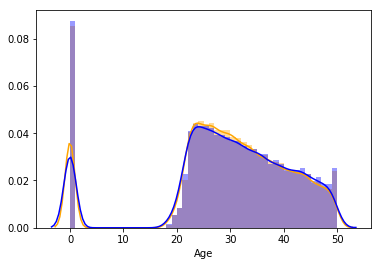

In [43]:
train.loc[train['Age'] <= 0, 'Age'] = 0
test.loc[test['Age'] <= 0, 'Age'] = 0

sns.distplot(train['Age'], color='orange')
sns.distplot(test['Age'], color='blue')

In [44]:
train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Age', 'Days_Since_Disbursal',
       'CREDIT.HISTORY.LENGTH_total_months', 'AVERAGE.ACCT.AGE_to

In [45]:
## remove attributes : UniqueID, supplier_id, Current_pincode_ID, Employee_code_ID, Date.of.Birth, DisbursalDate

y_train = train['loan_default']
unique_id = test['UniqueID']

train = train.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis = 1)

test = test.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis = 1)




In [46]:
## Class Imbalance

y_train.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [48]:
import lightgbm
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.041,
    'learning_rate': 0.0083,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1
}

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_std = sc.fit_transform(train[train.columns.difference(['loan_default'])])

x_test = sc.transform(test)

In [55]:
train_std = pd.DataFrame(train_std)
test_std = pd.DataFrame(x_test)

train_std['loan_default'] = y_train

In [57]:
## Resampling: 

train_pos = train_std[train_std['loan_default'] == 1]
train_neg = train_std[train_std['loan_default'] == 0]

train_std['loan_default'].value_counts()


0    182543
1     50611
Name: loan_default, dtype: int64

In [59]:
## minority class - positive class
from sklearn.utils import resample

train_pos_upsampled = resample(train_pos, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(train_neg),    # to match majority class
                                 random_state=42) 
 
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_neg, train_pos_upsampled])

train_upsampled['loan_default'].value_counts()


1    182543
0    182543
Name: loan_default, dtype: int64

In [64]:
def augment(train,num_n=1,num_p=2):
    newtrain=[train]
    
    n=train[train.loan_default==0]
    for i in range(num_n):
        newtrain.append(n.apply(lambda x:x.values.take(np.random.permutation(len(n)))))
    
    for i in range(num_p):
        p=train[train.loan_default>0]
        newtrain.append(p.apply(lambda x:x.values.take(np.random.permutation(len(p)))))
    return pd.concat(newtrain)

In [65]:
x = augment(train_upsampled)

In [66]:
train_data = lightgbm.Dataset(x.drop(['loan_default'], axis=1), label=x.loan_default)

clf = lightgbm.train(param, train_data, 15000, early_stopping_rounds = 3000, valid_sets = [train_data], verbose_eval=5000)

y_pred_lgbm = clf.predict(x_test, num_iteration=clf.best_iteration)



Training until validation scores don't improve for 3000 rounds.
[5000]	training's auc: 0.683334
[10000]	training's auc: 0.687647
[15000]	training's auc: 0.690178
Did not meet early stopping. Best iteration is:
[14999]	training's auc: 0.690178


In [68]:
#predictions = y_pred_rf*0.5 + y_pred_lgb*0.5

submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_lgbm})

submission.to_csv('submission.csv',index=False)
